<a href="https://colab.research.google.com/github/AlineBarrucci26/TCC_MBA_data_science_analytics/blob/main/case_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Uma máquina de produção parada custa cerca de R$ 3.500/dia para o Grupo Boticário.
No caso de a máquina falhar, ficamos cerca de 8 dias sem máquina.
Caso apliquemos a manutenção preventiva, ficaríamos apenas 5 dias sem máquina. 
Baseado nestas informações, elabore um modelo de manutenção preventiva com os dados anexados.

Objetivo prever quando a maquina vai falhar? e realizar uma manutençao preventiva

In [ ]:
! pip install pip install scikit-plot
! pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np


import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.inspection import permutation_importance
from matplotlib import pyplot


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler


In [ ]:
#lendo o data frame
df = pd.read_csv('./registro_falha_maquinasGB.csv',sep = ';')

In [ ]:
#observando algumas variaveis
df.head(5)

,Unnamed: 0,dispositivo,falhou,atributo1,atributo2,atributo3,atributo4,atributo5,atributo6,atributo7,atributo8,atributo9,data
0,0,B0T01085,0,215630672,56,0,52,6,407438,0,0,7,2020-08-10
1,1,B0T0166B,0,61370680,0,3,0,6,403174,0,0,0,2020-08-10
2,2,B0T01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2020-08-10
3,3,B0T01JE0,0,79694024,0,0,0,6,410186,0,0,0,2020-08-10
4,4,B0T01R2B,0,135970480,0,0,0,15,313173,0,0,3,2020-08-10


In [ ]:
#tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   124494 non-null  int64 
 1   dispositivo  124494 non-null  object
 2   falhou       124494 non-null  int64 
 3   atributo1    124494 non-null  int64 
 4   atributo2    124494 non-null  int64 
 5   atributo3    124494 non-null  int64 
 6   atributo4    124494 non-null  int64 
 7   atributo5    124494 non-null  int64 
 8   atributo6    124494 non-null  int64 
 9   atributo7    124494 non-null  int64 
 10  atributo8    124494 non-null  int64 
 11  atributo9    124494 non-null  int64 
 12  data         124494 non-null  object
dtypes: int64(11), object(2)
memory usage: 12.3+ MB


In [ ]:
#estatisticas basicas
df.describe()

,Unnamed: 0,falhou,atributo1,atributo2,atributo3,atributo4,atributo5,atributo6,atributo7,atributo8,atributo9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,62246.500000,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,35938.466544,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,31123.250000,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,62246.500000,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,93369.750000,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,124493.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [ ]:
# quantos dispositivos temos no df
df['dispositivo'].count()

124494

In [ ]:
# um mesmo disposito aparece mais de uma vez no df
df.groupby('dispositivo').dispositivo.nunique().count()

1168

In [ ]:
# vou ordernar o dataframe por dispositvo e data e contar 1 quando aparece um dispositivo novo no df.
df=df.sort_values(by=['dispositivo','data'], ascending=[True, True])
df['mudou_dispositivo'] = np.where((df.dispositivo != df.dispositivo.shift(1)), 1, 0)
df.head(5)

,Unnamed: 0,dispositivo,falhou,atributo1,atributo2,atributo3,atributo4,atributo5,atributo6,atributo7,atributo8,atributo9,data,mudou_dispositivo
0,0,B0T01085,0,215630672,56,0,52,6,407438,0,0,7,2020-08-10,1
1163,1163,B0T01085,0,1650864,56,0,52,6,407438,0,0,7,2020-08-11,0
2326,2326,B0T01085,0,124017368,56,0,52,6,407438,0,0,7,2020-08-12,0
3489,3489,B0T01085,0,128073224,56,0,52,6,407439,0,0,7,2020-08-13,0
4651,4651,B0T01085,0,97393448,56,0,52,6,408114,0,0,7,2020-08-14,0


In [ ]:
df.groupby('dispositivo').mudou_dispositivo.count()

dispositivo
B0T01085      6
B0T013BB      6
B0T0166B      6
B0T01E6Y     48
B0T01JE0      6
           ... 
Q0B1VMZB    292
Q0B1VQFY    125
Q0B26YZB     84
Q0B282ZV     84
Q0B2PBHX     83
Name: mudou_dispositivo, Length: 1168, dtype: int64

In [ ]:
#total de datas no data frame
df['data'].nunique()

304

In [ ]:
#transformando data em ano mes
df['anomes'] = df['data'].astype(str).str.slice(0,7)

In [ ]:
#média de falhha
df['falhou'].mean()

0.000851446656063746

In [ ]:
df.groupby(['anomes'])['anomes'].count()

anomes
2020-08    18621
2020-09    21206
2020-10    20850
2020-11    13187
2020-12    11399
2021-01    10829
2021-02     9610
2021-03     9521
2021-04     4950
2021-05     4038
2021-06      283
Name: anomes, dtype: int64

In [ ]:
#probabilidade de falha por mes
df.groupby(['anomes'])['falhou'].sum()/df['falhou'].count()*100

anomes
2020-08    0.013655
2020-09    0.015262
2020-10    0.008033
2020-11    0.005623
2020-12    0.017672
2021-01    0.004820
2021-02    0.011246
2021-03    0.006426
2021-04    0.000000
2021-05    0.001607
2021-06    0.000803
Name: falhou, dtype: float64

In [ ]:
E consequentemente o numero de falhas diminuem tambem. 

In [ ]:
df['data'] = pd.to_datetime(df['data'].str.title(),format='%Y-%m-%d')                            

In [ ]:
dispositivos_falha = df[(df['falhou']==1)]

In [ ]:
dispositivos_falha['dispositivo'].count()

106

In [ ]:
dispositivos_falha.groupby('falhou').dispositivo.nunique()

falhou
1    106
Name: dispositivo, dtype: int64

Vou fazer uma variavel que conta a diferença de dias da primeira vez que o dispositivo aparece para a data que consta na planilha

In [ ]:
Aux = df

In [ ]:
#Select the first record of each machine
inicio = Aux[Aux['mudou_dispositivo'] == 1]
inicio = inicio[['data','dispositivo']]

In [ ]:
#rename date to start_date
inicio=inicio.rename(index=str, columns={"data": "comeco_data"})
#convert START_DATE to date
inicio['comeco_data'] = pd.to_datetime(starter['comeco_data'])

In [ ]:
Aux=Aux.sort_values(by=['dispositivo', 'data'], ascending=[True, True])
inicio=inicio.sort_values(by=['dispositivo'], ascending=[True])
df  =Aux.merge(inicio, on=['dispositivo'], how='left')

In [ ]:
df.head(5)

,Unnamed: 0,dispositivo,falhou,atributo1,atributo2,atributo3,atributo4,atributo5,atributo6,atributo7,atributo8,atributo9,data,mudou_dispositivo,anomes,comeco_data
0,0,B0T01085,0,215630672,56,0,52,6,407438,0,0,7,2020-08-10,1,2020-08,2020-08-10
1,1163,B0T01085,0,1650864,56,0,52,6,407438,0,0,7,2020-08-11,0,2020-08,2020-08-10
2,2326,B0T01085,0,124017368,56,0,52,6,407438,0,0,7,2020-08-12,0,2020-08,2020-08-10
3,3489,B0T01085,0,128073224,56,0,52,6,407439,0,0,7,2020-08-13,0,2020-08,2020-08-10
4,4651,B0T01085,0,97393448,56,0,52,6,408114,0,0,7,2020-08-14,0,2020-08,2020-08-10


In [ ]:
df['dias'] = pd.to_datetime(df['data']) - pd.to_datetime(df['comeco_data'])

In [ ]:
df[df['falhou']==1]['dias'].max()

Timedelta('298 days 00:00:00')

In [ ]:
df[df['falhou']==1]['dias'].min()

Timedelta('4 days 00:00:00')

In [ ]:
df[df['falhou']==1]['dias'].mean()

Timedelta('106 days 21:44:09.056603774')

# Alise Variaveis explicativas (atributos)

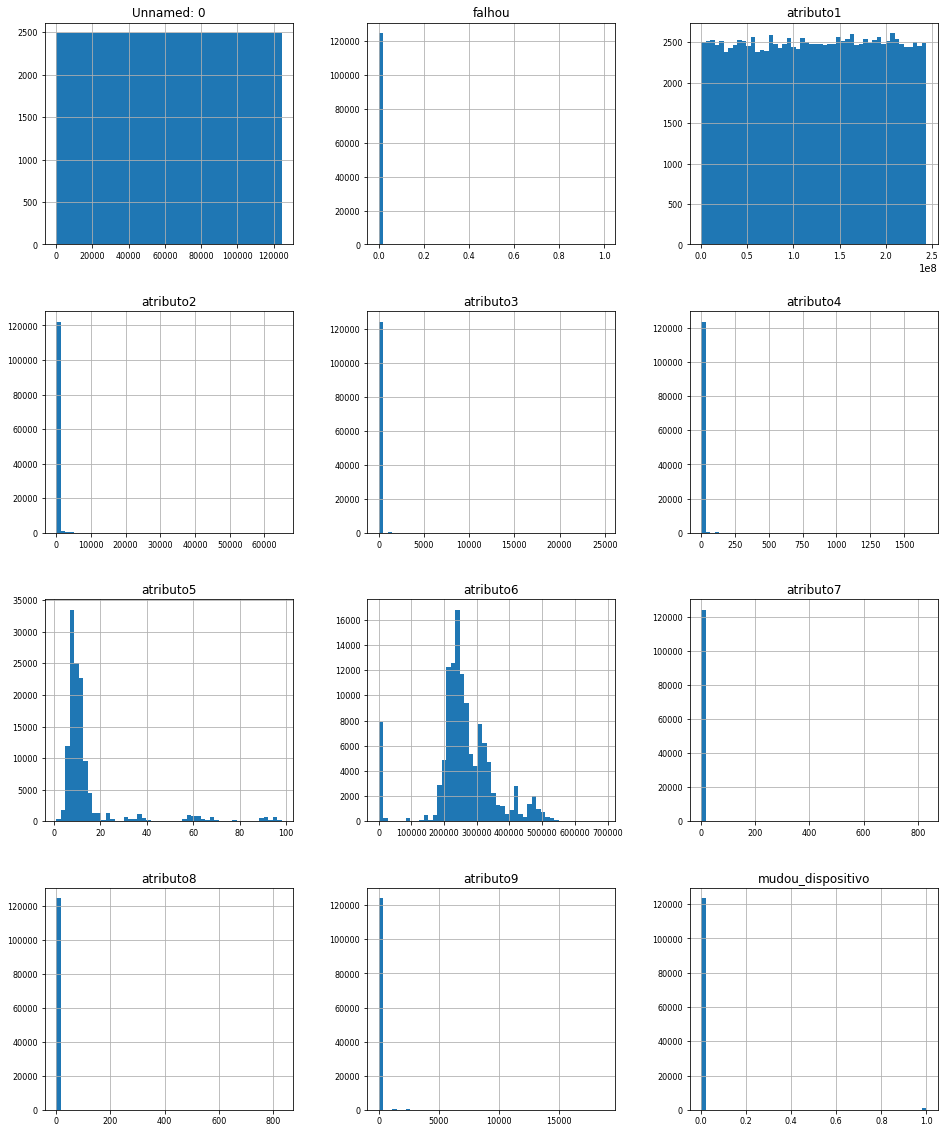

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

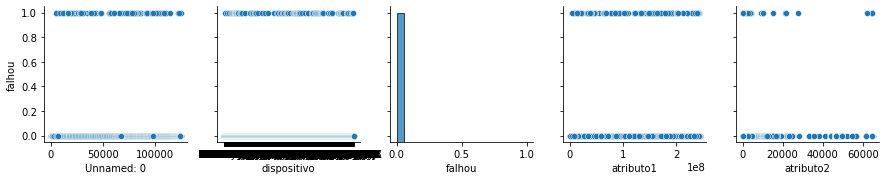

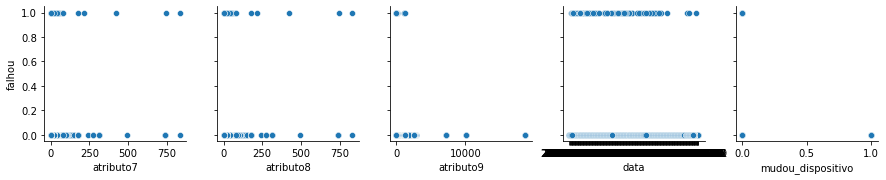

In [ ]:
for i in range(0, len(df.columns), 9):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['falhou'])

In [ ]:
correlation = df.corr()

<AxesSubplot:>

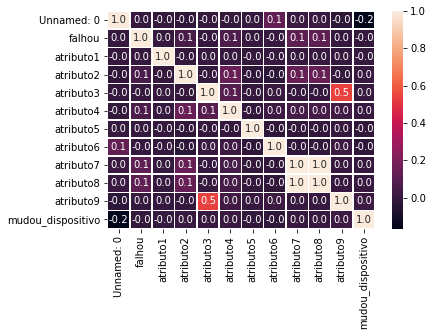

In [ ]:
# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
#calculo do IV
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
iv, woe = iv_woe(data = df, target = 'falhou')

Information value of Unnamed: 0 is 0.416471
Information value of dispositivo is 14.58569
Information value of atributo1 is 0.161802
Information value of atributo2 is 0.0
Information value of atributo3 is 0.0
Information value of atributo4 is 0.0
Information value of atributo5 is 0.139519
Information value of atributo6 is 0.205411
Information value of atributo7 is 0.0
Information value of atributo8 is 0.0
Information value of atributo9 is 0.045126
Information value of data is 1.61809
Information value of mudou_dispositivo is 0.003306


A variavel Atributo6 tem o maior IV, seguido do Atributo1 e Atributo5 as demais não explicam nada sobre a ocorrencia do evento.
Unnamed e dispositivo não seram consideradas, assim como data e anomes.

# Modelagem

Dado que a média de uso do dispositivo para ele apresentar falhas é 106 dias.
O modelo tera apenas os dispositivos que tem uso Maior ou igual a 106 dias,
Essa sera a primeira condição para o produto ter mais chances de falhas.

In [ ]:
base_modelagem =  df[df['dias'] >= '106 days 21:44:09.056603774']

In [ ]:
var = ['atributo1','atributo2','atributo3','atributo4','atributo5','atributo6','atributo7','atributo8','atributo9','mudou_dispositivo']

In [ ]:
X = base_modelagem[var]
y = base_modelagem['falhou']

C:\Users\Aline\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


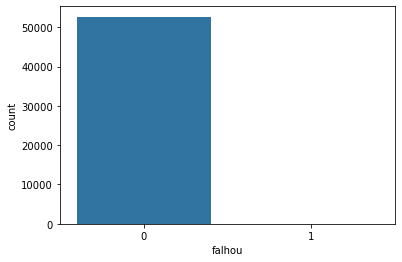

In [ ]:
# plotar gráfico de barras para as Classes
sns.countplot('falhou', data=base_modelagem);

É importante observar que o evento falhou =  1 é raro e pode impactar no treinamento do modelo.
Vou treinar um modelo sem nenhum tratamento para observas os resultados

In [ ]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Acurácia: 0.9989

AUC: 0.5000



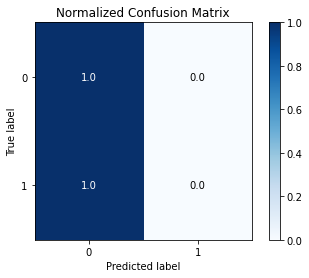

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
# imprimir relatório de classificação

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Uma Acuracia de 0.99 é de desconfiar,
o modelo previu corretamente todos as nao falhas e falhas principalmente pelo baixo volume de falhas na base.
as variaveis explicativas como visto mais acima nao explicam muito o modelo confirmando isso nos numeros abaixo;

In [ ]:
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : 0.0 
Feature : 1 has score  : 0.0 
Feature : 2 has score  : 0.0 
Feature : 3 has score  : 0.0 
Feature : 4 has score  : 0.0 
Feature : 5 has score  : 0.0 
Feature : 6 has score  : 0.0 
Feature : 7 has score  : 0.0 
Feature : 8 has score  : 0.0 
Feature : 9 has score  : 0.0 


Para tentar melhorar os resultados vou usar uma tecnica de balancamento das classes.

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()

0    41
1    41
Name: falhou, dtype: int64


C:\Users\Aline\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


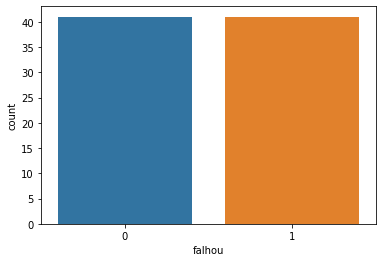

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

Acurácia: 0.9067

AUC: 0.6322



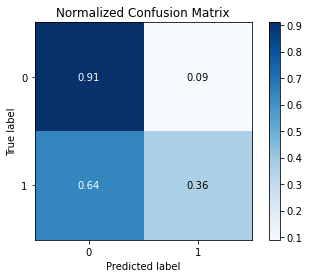

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))
     

Uma acuracia de 90% é mais aceitavel e podemos e nosso objetivo é prever as falhas e o modelo previu 36% das falhas que foram verdadeiras falhas. 

In [ ]:
model_res

LogisticRegression()

In [ ]:
model.coef_

array([[-4.35087709e-08,  3.34559561e-09, -5.39429288e-10,
        -3.64733545e-11, -9.59783053e-10, -1.69895667e-05,
         7.00624865e-11,  7.00624865e-11, -3.96848931e-10,
         0.00000000e+00]])

In [ ]:
# perform permutation importance
results = permutation_importance(model_res, X_res, y_res, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : -0.007317073170731714 
Feature : 1 has score  : 0.0 
Feature : 2 has score  : 0.0 
Feature : 3 has score  : 0.0 
Feature : 4 has score  : 0.0 
Feature : 5 has score  : 0.0 
Feature : 6 has score  : 0.0 
Feature : 7 has score  : 0.0 
Feature : 8 has score  : 0.0121951219512195 
Feature : 9 has score  : 0.09999999999999999 


Acima temos a importancia das variaveis e temos apenas a feature  0, 8 e 9 com importancia sendo o atributo 9 e a variavel mudou_dispositivo.

Conclusão - as manutenções preventivas devem ocorrer apos os 106 dias de "uso" do dispositivo.
As chaces do dipositivo apresentar falha apos os 106 dias é de 36%. 